In [243]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
import pickle
import os

from amftrack.util.sys import (

    update_plate_info,

    get_current_folders,
)

from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
)

from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Node,
)
from amftrack.pipeline.functions.post_processing.extract_study_zone import (
    load_study_zone,
)
from amftrack.pipeline.functions.post_processing.exp_plot import *
import pickle
import scipy.io as sio
import networkx as nx
import numpy as np
from sthype import SpatialGraph, HyperGraph
from sthype.graph_functions import spatial_temporal_graph_from_spatial_graphs

import matplotlib.pyplot as plt
import os
import pickle
from tqdm import tqdm
import pandas as pd
from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_all_edges,
    get_all_nodes, get_timedelta_second,
)
from amftrack.pipeline.functions.transport_processing.high_mag_videos.temporal_graph_util import *
from shapely import LineString
from sthype.plot import plot_spatial_temporal_graph, plot_spatial_temporal_graph_node, plot_spatial_graph, plot_spatial_temporal_graph_hyperedge


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [244]:
path_root = r"C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\graphs"
plates = [
    "441_20230807", "449_20230807", "310_20230830"
]
plate_id = plates[1]
path_tot = os.path.join(path_root,f"graph{plate_id}.pickle")
spatial_temporal_graph,folders = load(path_tot)

In [245]:
# folders = folders.transpose()
folders = folders.sort_values(by="datetime")

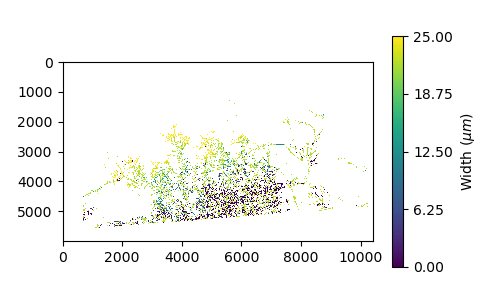

(<Figure size 500x300 with 2 Axes>, <AxesSubplot: >)

In [246]:
exp = make_exp(spatial_temporal_graph,folders,make_pixel_list=True)

from amftrack.pipeline.functions.image_processing.experiment_util import (
    plot_edge_color_value,
)
from matplotlib import cm

vmax = 25
vmin = 0
t=0
region = [[3000*5,5000*5],[5250*5,7500*5]]
region = [[0*5,0*5],[30000,52000]]

plot_edge_color_value(
    exp,
    t,
    lambda edge : edge.get_attribute("activation",t),
    # lambda edge : 2,
    
    cmap=cm.get_cmap("viridis", 100),
    v_min=vmin,
    v_max=vmax,
    plot_cmap=True,
    show_background=False,
    dilation=10,
    figsize=(5, 3),
    alpha = 1,
    region = region
)

In [234]:
exp = make_exp(spatial_temporal_graph,folders,make_pixel_list=True)
spatial_temporal_graph = simplify(spatial_temporal_graph)
fix_attributes(spatial_temporal_graph)
exp = make_exp(spatial_temporal_graph,folders)
weights = {(begin, end): LineString(data['pixel_list']).length * 1.725 for begin, end, data in
           spatial_temporal_graph.edges(data=True)}
nx.set_edge_attributes(spatial_temporal_graph, weights, "length")

38979
22
1


In [236]:
index0 = 39
index1 = 41
exp1 = add_fluxes(exp,index0,index1,folders)

net_flow 8.881784197001252e-15
found all cycles


Processing Cycles: 100%|█████████████████████████████████████████████████████████████| 273/273 [00:04<00:00, 54.60it/s]


found all cycles


Processing Cycles: 100%|█████████████████████████████████████████████████████████████| 292/292 [00:05<00:00, 57.05it/s]


found all cycles


Processing Cycles: 100%|█████████████████████████████████████████████████████████████| 292/292 [00:05<00:00, 56.00it/s]


net_flow 0.0
found all cycles


Processing Cycles: 0it [00:00, ?it/s]


found all cycles


Processing Cycles: 100%|███████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 8013.96it/s]


found all cycles


Processing Cycles: 100%|███████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 7992.96it/s]


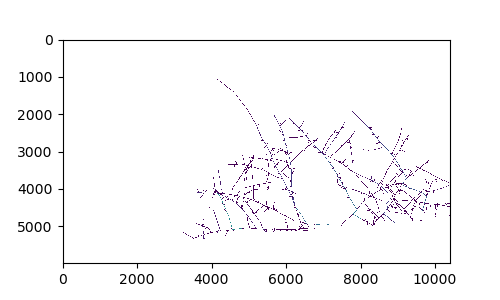

In [237]:
region = [[0*5,0*5],[30000,52000]]

plot_region(exp1,region,"QBC_net",10)

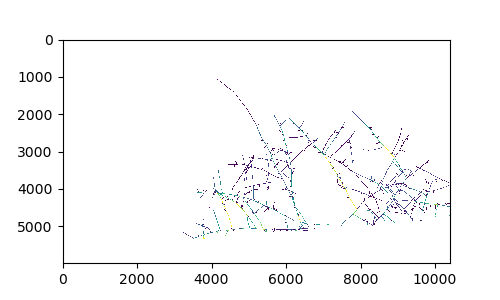

In [238]:
plot_region(exp1,region,"speed_heaton",0.3)

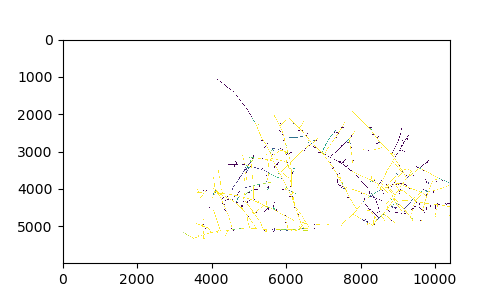

In [239]:
plot_region(exp1,region,"speed_backflow2",0.3)

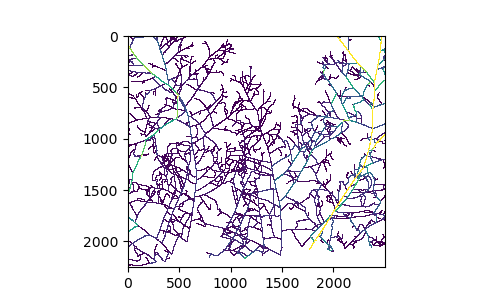

In [180]:
plot_region(exp1,region,"speed_backflow",0.3)

In [107]:
long_hyperedges = [hyperedge for hyperedge in hyperedges if len(spatial_temporal_graph.get_hyperedge_edges(hyperedge))>300]


In [108]:
long_hyperedges

[3, 326, 1422]

In [62]:
spatial_temporal_graph

In [95]:
edges = spatial_temporal_graph.get_hyperedge_edges(1422)


In [96]:
def merge(edges,graph):
    new_list = []
    for edge in edges:
        if edge[0] in graph:
            new_list.append(edge[0])
    if edge[1] in graph:
        new_list.append(edge[1])
    edges_new = []
    for i in range(len(new_list)-1):
        edges_new.append((new_list[i],new_list[i+1]))
    return(edges_new)
                
    

In [105]:
edges_new = merge(edges,exp1.nx_graph[0])
backflow_speeds = [(exp1.nx_graph[0][u][v]["speed_backflow"])*(2*(u>v)-1) for (u,v) in edges_new]
lengths = [(exp1.nx_graph[0][u][v]["length"]) for (u,v) in edges_new]
activations = [(spatial_temporal_graph[u][v]["post_hyperedge_activation"]) for (u,v) in edges_new]
if activations[0]>activations[-1]:
    activations.reverse()
    lengths.reverse()    
    backflow_speeds.reverse()    
abcisse = np.cumsum(lengths)


In [104]:
activations

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 4]

In [100]:
list(abcisse).reverse()

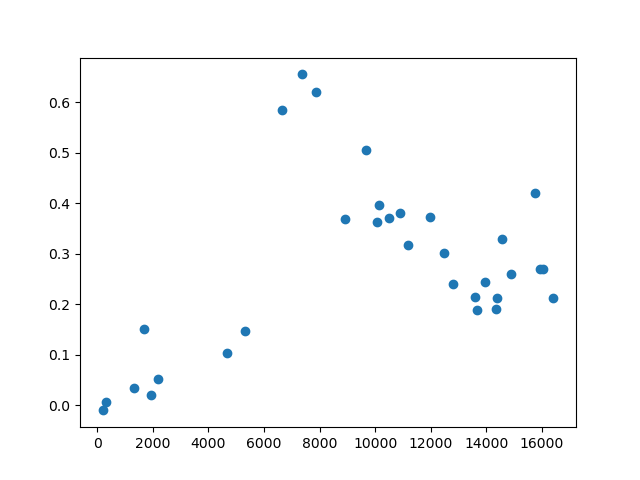

In [106]:
fig,ax = plt.subplots()
ax.scatter(abcisse,backflow_speeds)

In [120]:
refs = {
    "310_20230830": {
        "20230901_Plate310": "20230901_0719_Plate06",
        "20230902_Plate310": "20230902_1343_Plate07",
        "20230903_Plate310": "20230903_1143_Plate07",
        "20230904_Plate310": "20230904_0942_Plate07",
        "20230905_Plate310": "20230905_1345_Plate07",
        # "20230906_Plate310" : "20230906_1220_Plate07",
    },
    "441_20230807": {
        # "20230810_Plate441": "20230810_1005_Plate14",
        "20230811_Plate441": "20230811_1605_Plate14",
        "20230812_Plate441": "20230812_1006_Plate14",
        "20230813_Plate441": "20230813_1618_Plate14",
    },
    "449_20230807": {
        "20230813_Plate449": "20230813_1606_Plate10",
        "20230814_Plate449": "20230814_1019_Plate10",
        "20230815_Plate449": "20230815_1021_Plate10",
        "20230816_Plate449": "20230816_1027_Plate10",
        # "20230818_Plate449": "20230818_1107_Plate10",
    },
}
indexes = refs[plate_id]
for plate_id_video in list(indexes.keys()):
    index0 = np.where(folders["folder"] == indexes[plate_id_video])[0][0]
    index1 = index0+1
    break

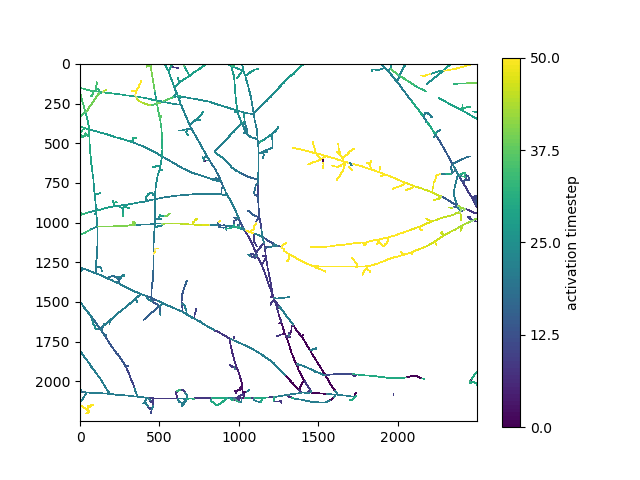

(<Figure size 640x480 with 2 Axes>, <AxesSubplot: >)

In [194]:
from amftrack.pipeline.functions.image_processing.experiment_util import (
    plot_edge_color_value,
)
from matplotlib import cm

vmax = 50
vmin = 0
t=0
region = [[3000*5,5000*5],[5250*5,7500*5]]
# region = [[0*5,0*5],[26000,52000]]

fig,ax = plt.subplots()
plot_edge_color_value(
    exp,
    t,
    lambda edge : edge.get_attribute("activation",t),
    
    cmap=cm.get_cmap("viridis", 100),
    v_min=vmin,
    v_max=vmax,
    plot_cmap=True,
    show_background=False,
    dilation=10,
    figsize=(5, 3),
    alpha = 1,
    figax = (fig,ax),
    region = region,
    label_colorbar = "activation timestep"
)


In [220]:
folders.iloc[39]['folder']

'20230904_0942_Plate07'

In [224]:
index0 = 39 
index1 = 41
weights, nodes_exp = get_growing_nodes(exp,index0,index1)

In [225]:
r0 = 3
nodes_source = [node for node in nodes_exp if weights[node]/(np.pi*r0**2)*3600 >10]
nodes_source = [node for node in nodes_source if weights[node]/(np.pi*r0**2)*3600 <=1000]


In [226]:
G = create_subgraph_by_attribute(spatial_temporal_graph, "activation", index1)
exp0 = make_exp(G,folders)

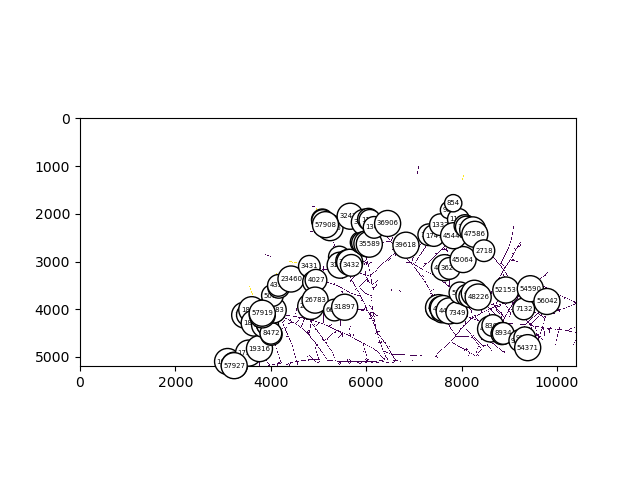

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: >,
 <function amftrack.pipeline.functions.transport_processing.high_mag_videos.plotting.plot_edge_color_value_3.<locals>.<lambda>(x)>)

In [227]:

from amftrack.pipeline.functions.transport_processing.high_mag_videos.plotting import *

from matplotlib import cm
vmax = 1
vmin = 0
t=0
# region = [[3750*5,4500*5],[5250*5,8000*5]]
region = [[0*5,0*5],[26000,52000]]

fig,ax = plt.subplots()
plot_edge_color_value_3(
    exp0,
    t,
    lambda edge : 1-(edge.get_attribute("activation",t)<=index0),
    
    cmap=cm.get_cmap("viridis", 100),
    v_min=vmin,
    v_max=vmax,
    plot_cmap=True,
    show_background=False,
    dilation=10,
    figsize=(5, 3),
    alpha = 1,
    figax = (fig,ax),
    region = region,
    nodes = nodes_source
)


In [170]:
G0 = create_subgraph_by_attribute(spatial_temporal_graph, "post_hyperedge_activation", index0)
components = nx.connected_components(G0)
largest_component = max(components, key=len)
largest_component_graph = create_subgraph_from_nodelist(G0,largest_component)

exp1 = make_exp(largest_component_graph,folders)

In [215]:
for _,_,data in largest_component_graph.edges(data=True) :
    break
data

{'weight': 118,
 'pixel_list': [(22932.38743541417, 3706.579791202049),
  (22931.77608889199, 3707.3241026602227),
  (22931.16474236981, 3708.068414118397),
  (22930.55339584763, 3708.8127255765708),
  (22929.94204932545, 3709.557037034745),
  (22929.330702803272, 3710.301348492919),
  (22928.71935628109, 3711.045659951093),
  (22928.10800975891, 3711.789971409267),
  (22927.496663236732, 3712.5342828674407),
  (22926.885316714553, 3713.278594325615),
  (22926.27397019237, 3714.0229057837887),
  (22925.662623670192, 3714.767217241963),
  (22925.051277148013, 3715.5115287001368),
  (22924.439930625835, 3716.255840158311),
  (22923.828584103652, 3717.000151616485),
  (22923.217237581473, 3717.744463074659),
  (22922.605891059295, 3718.488774532833),
  (22921.994544537116, 3719.2330859910066),
  (22921.383198014933, 3719.977397449181),
  (22920.771851492755, 3720.7217089073547),
  (22920.160504970576, 3721.466020365529),
  (22919.549158448397, 3722.2103318237027),
  (22918.937811926215, 3

In [171]:
from amftrack.pipeline.functions.transport_processing.high_mag_videos.add_BC import *
nodes = get_all_nodes(exp1,0)
nodes_sink = [node for node in nodes if get_min_activation(largest_component_graph,node.label)<=index0]
nodes_sink = find_lowest_nodes(nodes_sink, 0,15)
nodes_source = [node for node in nodes_source if node in nodes]

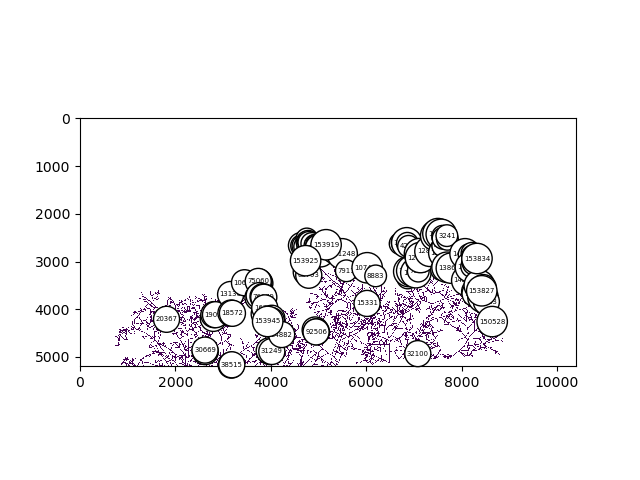

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: >,
 <function amftrack.pipeline.functions.transport_processing.high_mag_videos.plotting.plot_edge_color_value_3.<locals>.<lambda>(x)>)

In [172]:
from amftrack.pipeline.functions.transport_processing.high_mag_videos.plotting import *

from matplotlib import cm

vmax = 1
vmin = 0
t=0
# region = [[3750*5,4500*5],[5250*5,8000*5]]
# region = [[0*5,0*5],[28000,52000]]

fig,ax = plt.subplots()
plot_edge_color_value_3(
    exp1,
    t,
    lambda edge : 1-(edge.get_attribute("post_hyperedge_activation",t)<=index0),
    
    cmap=cm.get_cmap("viridis", 100),
    v_min=vmin,
    v_max=vmax,
    plot_cmap=True,
    show_background=False,
    dilation=10,
    figsize=(5, 3),
    alpha = 1,
    figax = (fig,ax),
    region = region,
    nodes = nodes_source
)


In [173]:
add_lipid_flux(exp1.nx_graph[0],nodes_source,nodes_sink,weights)

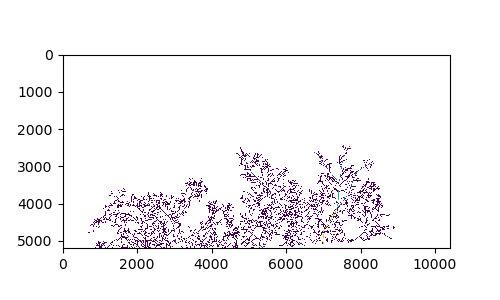

In [174]:
# region = [[3750*5,4500*5],[5250*5,8000*5]]

plot_region(exp1,region,"QBC_net",10)

In [176]:
edges = get_all_edges(exp1,0)
densities = [abs(data["QBC_net"]/(np.pi*data[str(index0)]['radius']**2*3)) for _,_,data in largest_component_graph.edges(data=True)]
fig,ax = plt.subplots()
ax.hist(speeds,20)
ax.set_yscale("log")

KeyError: 'radius'

In [223]:
add_flows_heaton(exp1.nx_graph[0],nodes_source,nodes_sink,weights,index0)

net_flow 7.105427357601002e-15
found all cycles


Processing Cycles: 100%|█████████████████████████████████████████████████████████████| 651/651 [00:15<00:00, 41.70it/s]


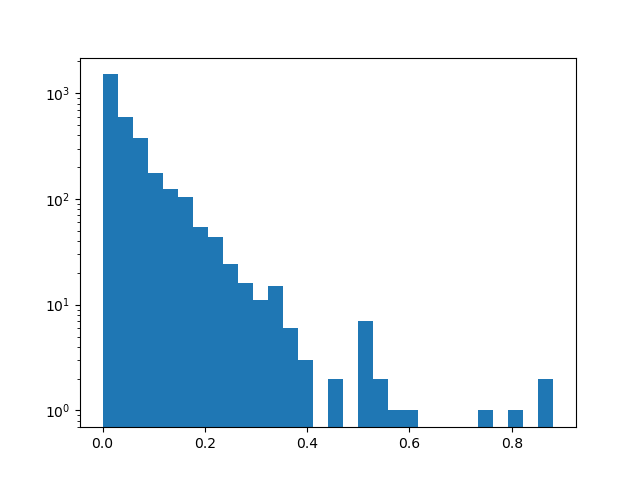

In [224]:
G = exp1.nx_graph[0]
speeds = [abs(G[u][v]['speed_heaton']) for u, v in G.edges()]
fluxes = [G[u][v]['QBC_net'] for u, v in G.edges()]
fig,ax = plt.subplots()
ax.hist(speeds,30)
# ax.hist(fluxes2,30,alpha = 0.5)
ax.set_yscale("log")

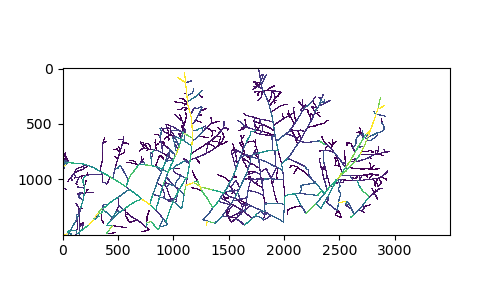

c:\users\coren\documents\phd\code\amftrack\amftrack\pipeline\functions\transport_processing\high_mag_videos\temporal_graph_util.py:469: RuntimeWarning: divide by zero encountered in double_scalars
  color = 'red'


In [225]:
region = [[3750*5,4500*5],[5250*5,8000*5]]

plot_region(exp1,region,"speed_heaton",0.3)

In [233]:
add_backflows(exp1.nx_graph[0],nodes_source,nodes_sink,index0)

found all cycles


Processing Cycles: 100%|█████████████████████████████████████████████████████████████| 930/930 [00:25<00:00, 36.06it/s]


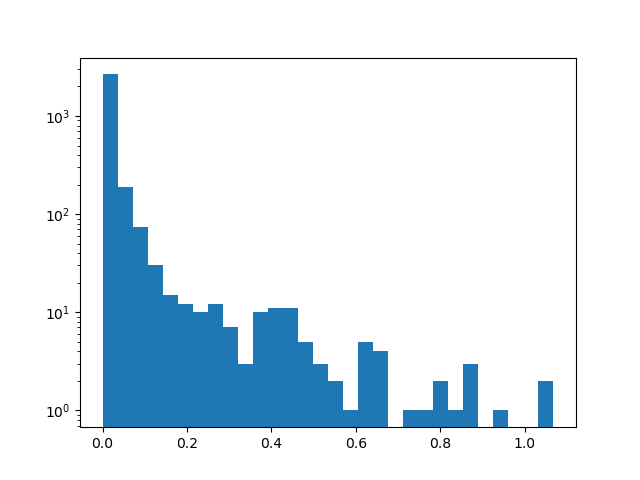

In [234]:
G = exp1.nx_graph[0]
speeds = [abs(G[u][v]['speed_backflow']) for u, v in G.edges()]
fig,ax = plt.subplots()
ax.hist(speeds,30)
# ax.hist(fluxes2,30,alpha = 0.5)
ax.set_yscale("log")

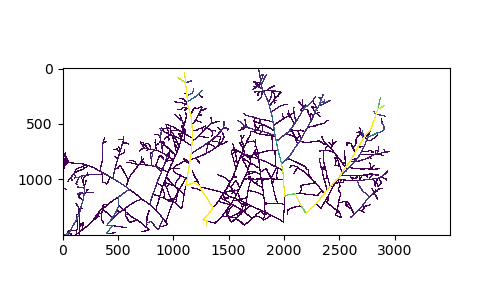

c:\users\coren\documents\phd\code\amftrack\amftrack\pipeline\functions\transport_processing\high_mag_videos\temporal_graph_util.py:467: RuntimeWarning: divide by zero encountered in double_scalars
  orientation = 1 - 2 * (relative_flux > 0)


In [235]:
region = [[3750*5,4500*5],[5250*5,8000*5]]

plot_region(exp1,region,"speed_backflow",0.3)

3.8263166209680937


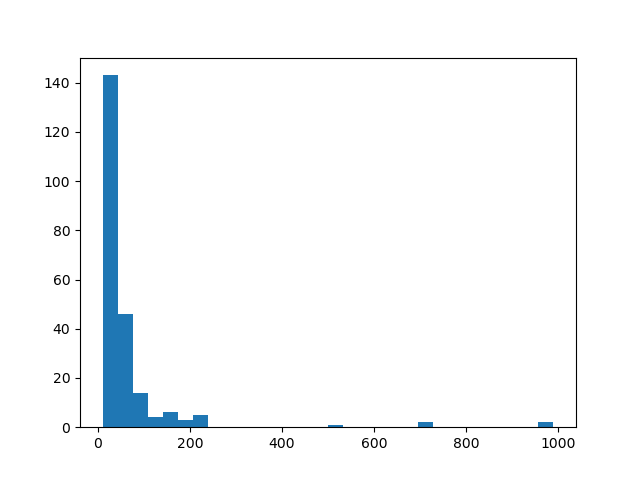

In [32]:
fig,ax = plt.subplots()
weights_list = [weights[node]/(np.pi*r0**2)*3600 for node in nodes_source]
ax.hist(weights_list,30)
print(np.sum(weights_list)/3600)
# ax.hist(fluxes2,30,alpha = 0.5)
# ax.set_yscale("log")

In [ ]:
from amftrack.pipeline.functions.transport_processing.high_mag_videos.plotting import *
from matplotlib import cm
downsizing = 5
t=0

fig, ax,f = plot_edge_color_value_3(
    exp1,
    t,
    lambda edge : abs(edge.get_attribute("speed",t)),
    cmap=cm.get_cmap("viridis", 100),
    plot_cmap=True,
    show_background=False,
    dilation=10,
    figsize=(5, 3),
    alpha = 1,
    v_min = 0,
    v_max = 0.2,
    region = [[3750*5,4500*5],[5250*5,8000*5]]
    # nodes = non_zero

)